
### 1. Import data and libraries


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [7]:
#defining path
path = r'C:\Users\gullo\OneDrive\Desktop\Career_Foundry\Data Immersion'


In [4]:
#3 import customers
df = pd.read_csv(os.path.join(path, 'A6- Advanced Analytics & Dashboard Design', 'Data', 'zomato_dirty.csv'), encoding='latin-1')

In [5]:
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.shape


(51717, 17)

In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
# dropping irrelevent rows url,address,phone,menu_item,dish_liked,reviews_list)
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43873 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              47356 non-null  object
 10  listed_in(city)              47356 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [10]:
# removing duplicates
df.drop_duplicates(inplace = True)
df.shape

(49853, 11)

## cleaning rate column


In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## creating a function to replace 'New' and 'nan' to null value and removing '/5' 

In [12]:
def handlerate(value):
    if(value=='NEW'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
# checking null values
df.rate.isnull().sum()

10013

## Filling Null Values in Rate Column with Mean

In [14]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49853 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         49853 non-null  object 
 1   online_order                 49853 non-null  object 
 2   book_table                   49853 non-null  object 
 3   rate                         49853 non-null  float64
 4   votes                        49853 non-null  int64  
 5   location                     49832 non-null  object 
 6   rest_type                    49630 non-null  object 
 7   cuisines                     49808 non-null  object 
 8   approx_cost(for two people)  49520 non-null  object 
 9   listed_in(type)              47269 non-null  object 
 10  listed_in(city)              47269 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


## Dropping Null Values

In [16]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## Renaming Column Names

In [17]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [18]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Jayanagar', 'Uttarahalli', 'JP Nagar', 'South Bangalore',
       'City Market', 'Nagarbhavi', 'Bannerghatta Road', 'BTM',
       'Kanakapura Road', 'Bommanahalli', 'CV Raman Nagar',
       'Electronic City', 'HSR', 'Marathahalli', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Koramangala 8th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Jalahalli',
       'Koramangala 4th Block', 'Bellandur', 'Sarjapur Road',
       'Whitefield', 'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Ulsoor', 'Lavelle Road', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'Cunningham Road',
       'Race Course Road', 'Church Street', 'Commercial Street',
       'St. Marks Road', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeeva

In [19]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

## 'Listed_in(city)' and 'location' columns has simiolar names so getting rid of 'listed_in(city)' column

In [20]:
df = df.drop(['listed_in(city)'], axis = 1)

In [21]:
df['Cost2plates'].unique()

array(['800', '300', '600', '550', '500', '450', '650', '700', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '3,000', '2,800', '3,400', '40', '2,100', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '2,700', '4,500', '140', '1,650'], dtype=object)

## Removing , from Cost2Plates Column to replace values to float

In [22]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  550.,  500.,  450.,  650.,  700.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 3000., 2800., 3400.,   40.,
       2100., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 2700., 4500.,  140., 1650.])

In [23]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


## Cleaning Rest Type Column

In [24]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

Quick Bites                   18458
Casual Dining                  9070
Cafe                           3135
Delivery                       2461
Dessert Parlor                 2157
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Casual Dining, Irani Cafee        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

## Cleaning Location Column

In [25]:
df['location'].value_counts(ascending  = False)

BTM                      4885
HSR                      2314
JP Nagar                 2060
Koramangala 5th Block    1973
Whitefield               1935
                         ... 
West Bangalore              5
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

## Cleaning Cuisines Column

In [26]:
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [27]:
df['cuisines'].value_counts(ascending  = False)

North Indian                                                                    2651
North Indian, Chinese                                                           2211
South Indian                                                                    1775
Biryani                                                                          880
Bakery, Desserts                                                                 870
                                                                                ... 
Pizza, North Indian, Modern Indian                                                 1
North Indian, South Indian, Kerala, Chinese                                        1
North Indian, Chinese, South Indian, Mughlai                                       1
Continental, Italian, North Indian, Mexican                                        1
Continental, Mediterranean, Italian, North Indian, Finger Food, Asian, Momos       1
Name: cuisines, Length: 2623, dtype: int64

In [28]:
cuisines = df['cuisines'].value_counts(ascending  = False)


In [29]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


## Keeping the 'Type' column as is

In [30]:
df['Type'].value_counts()

Delivery              23973
Dine-out              16055
Desserts               3346
Cafes                  1441
Drinks & nightlife      740
Buffet                  682
Pubs and bars           506
Name: Type, dtype: int64

In [31]:
# Export final df_ords 

df.to_csv(os.path.join(path, 'A6- Advanced Analytics & Dashboard Design', 'Data', 'zomato_clean1.csv'), encoding='latin-1')

In [34]:
# Create a correlation matrix using pandas

correlation_matrix = df.corr()

C:\Users\gullo\AppData\Local\Temp\ipykernel_1336\2088332821.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


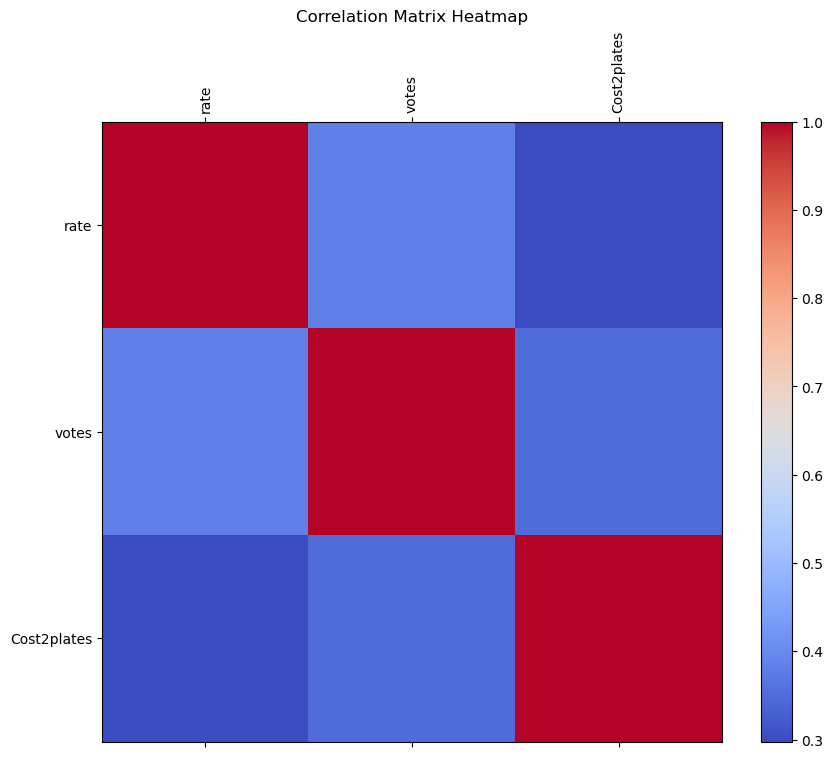

In [36]:

# Display the correlation matrix as a heatmap using plt.matshow()
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')

file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'correlation_matrix_heatmap.png')
                         
plt.savefig(file_path)
plt.show()

### Create a correlation heatmap using seaborn:

In [37]:
df.columns


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type'],
      dtype='object')

In [38]:
sub = df[['rate', 'votes', 'Cost2plates']]
          
          

In [39]:
sub

,rate,votes,Cost2plates
0,4.100000,775,800.0
1,4.100000,787,800.0
2,3.800000,918,800.0
3,3.700000,88,300.0
4,3.800000,166,600.0
...,...,...,...
51712,3.600000,27,1500.0
51713,3.686137,0,600.0
51714,3.686137,0,2000.0
51715,4.300000,236,2500.0


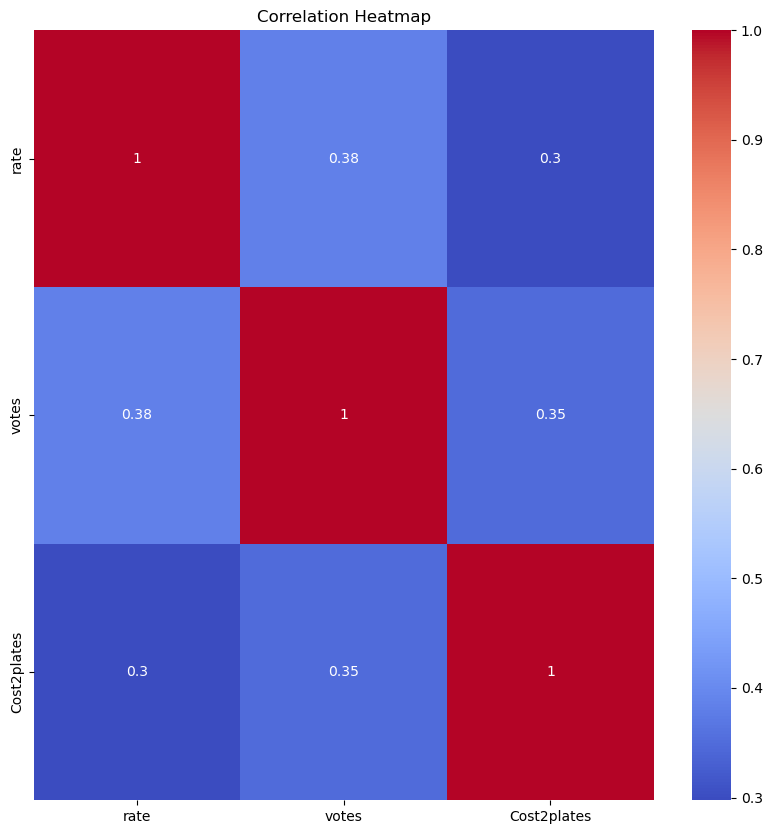

In [50]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap using seaborn
corr = sns.heatmap(sub.corr(), annot=True, cmap='coolwarm', ax=ax)

# Set the title of the heatmap
plt.title('Correlation Heatmap')

#save figure
file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'correlation_seaborn_heatmap.png')
                         
plt.savefig(file_path)

# Show the plot
plt.show()

### ScatterPlots

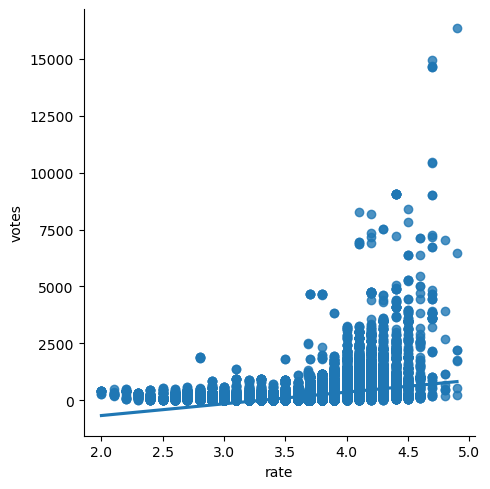

In [56]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(y = 'votes', x = 'rate', data = df)

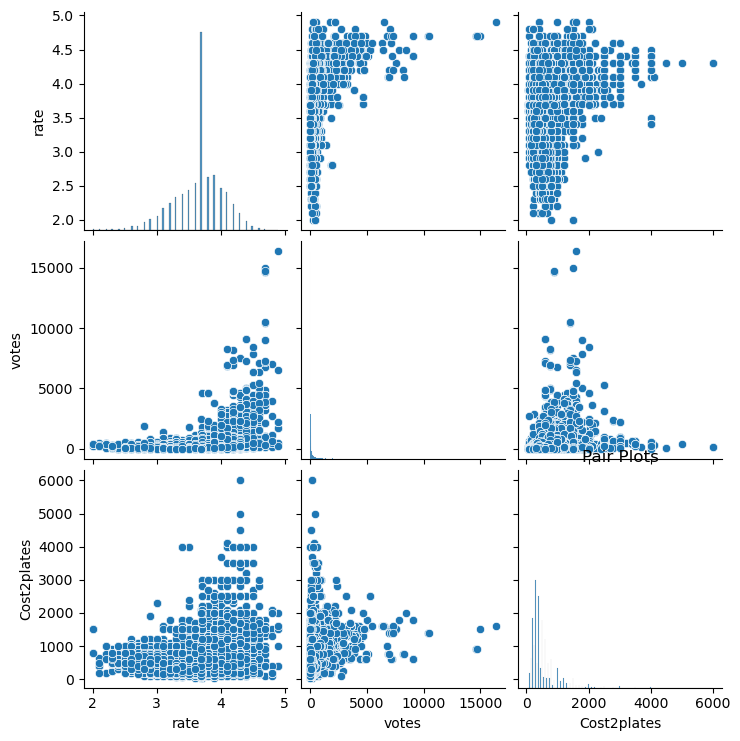

In [51]:
# Keep only the variables you want to use in the pair plot

g = sns.pairplot(sub)

# Set the title of the heatmap
plt.title('Pair Plots')

#save figure
file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'PairPlots.png')
                         
plt.savefig(file_path)

### Categorical Plots

<Axes: xlabel='rate', ylabel='Count'>

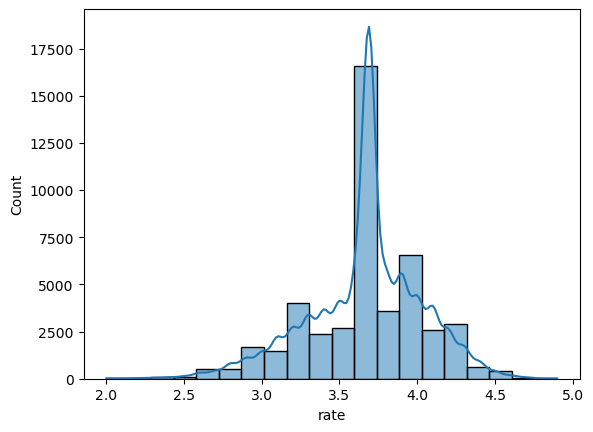

In [57]:
sns.histplot(df['rate'], bins = 20, kde = True)

### Observations:
#### Almost more than 50 percent of restaurants has rating between 3 and 4.
#### Restaurants having rating more than 4.5 are very rare.



In [59]:
df.loc[df['rate'] < 2.5, 'Ratings category'] = 'Low Rated'

In [60]:
df.loc[(df['rate'] >= 2.5) & (df['rate'] < 4), 'Ratings category'] = 'Good To Go'

In [61]:
df.loc[df['rate'] >= 4, 'Ratings category'] = 'Highly Recommend'

In [62]:
df['Ratings category'].value_counts(dropna = False)

Good To Go          37256
Highly Recommend     9353
Low Rated             134
Name: Ratings category, dtype: int64

<Axes: xlabel='Cost2plates', ylabel='Count'>

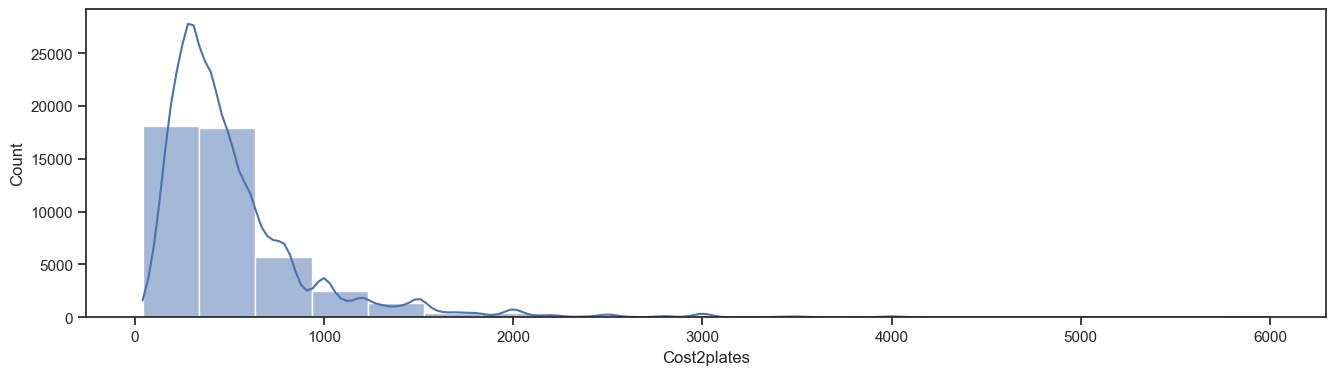

In [75]:
# Set the figure size
plt.figure(figsize=(16, 4))
sns.histplot(df['Cost2plates'], bins = 20, kde = True)


In [67]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type', 'Ratings category'],
      dtype='object')

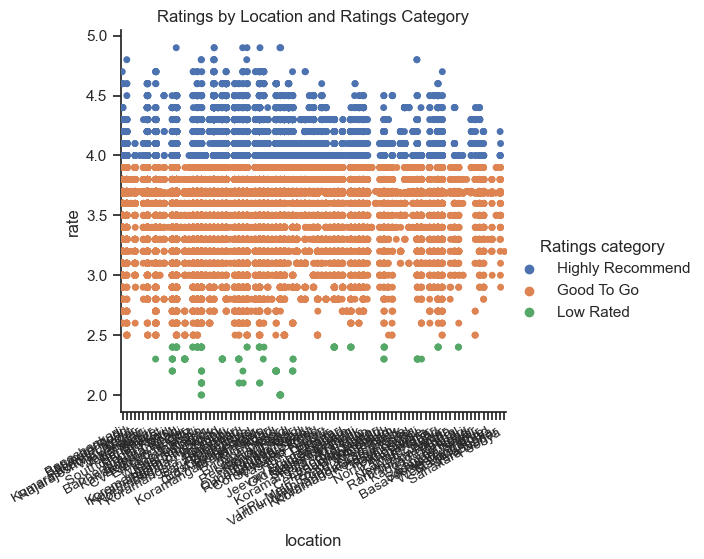

In [77]:
# Create a categorical plot in seaborn using the price categories created above

# Set the style
sns.set(style="ticks")

# Create the catplot
g = sns.catplot(x="location", y="rate", hue="Ratings category", data=df)

# Improve the x-axis tick labels
g.set_xticklabels(rotation=90, fontsize=10)


# Adjust the x-axis date labels and extend the x-axis line
g.fig.autofmt_xdate()

# Add a title to the chart
plt.title("Ratings by Location and Ratings Category")

# Show the plot
plt.show()

### Top Restaurants in Bangaluru

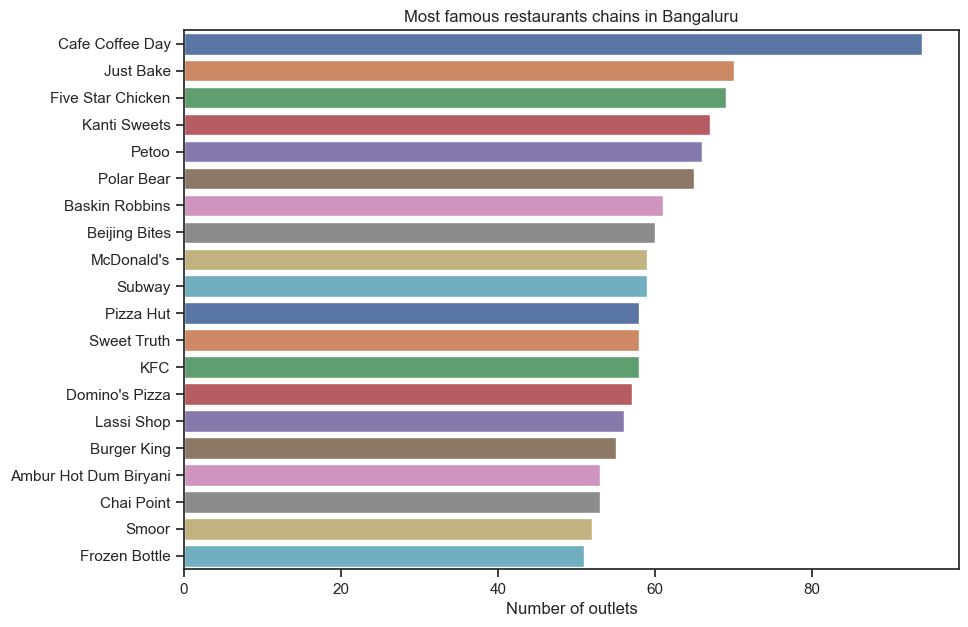

In [88]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

# Save the plot as a pie chart
file_path = 'C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz/Top_Restaurants.png'
# Save the pie chart
plt.savefig(file_path)

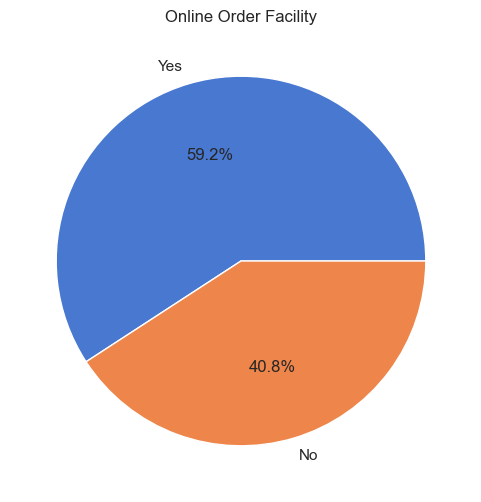

In [82]:
# Set the style
sns.set(style="ticks")

# Create the countplot with specific order for 'online_order' categories
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='online_order', order=['Yes', 'No'], palette='inferno')
plt.title('Online Order Facility')


# Convert the countplot to a pie chart by changing the plot type and using 'value_counts'
# to get the count of each category
order_counts = df['online_order'].value_counts()
plt.clf()
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title('Online Order Facility')

# Save the plot as a pie chart
file_path = 'C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz/online_order_piechart.png'
# Save the pie chart
plt.savefig(file_path)

# Show the pie chart
plt.show()
    

### Observations:
#### As clearly indicated,almost 60 per cent of restaurants in Banglore accepts online orders.
#### Nearly 40 per cent of the restaurants do not accept online orders.
#### This might be because of the fact that these restaurants cannot afford to pay commission to zomoto for giving them orders online. zomato may want to consider giving them some more benefits if they want to increse the number of restaurants serving their customers online.



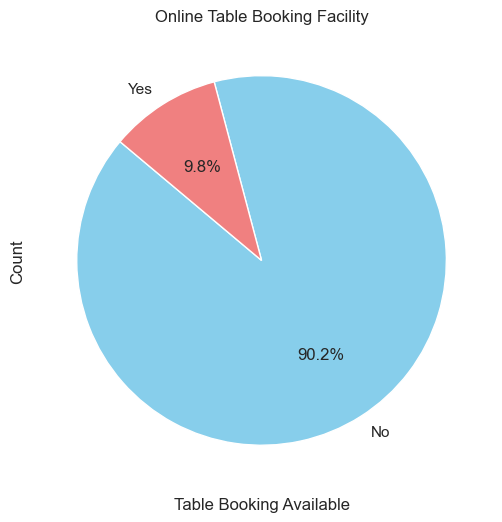

In [83]:
# Calculate the count of each category in the 'book_table' column
table_booking_counts = df['book_table'].value_counts()

# Set the figure size
plt.figure(figsize=(6, 6))

# Plot the pie chart
plt.pie(table_booking_counts, labels=table_booking_counts.index, colors=['skyblue', 'lightcoral'], autopct='%1.1f%%', startangle=140)

# Add title and labels
plt.title('Online Table Booking Facility')
plt.xlabel('Table Booking Available')
plt.ylabel('Count')

# Save the pie chart to a file
file_path = 'C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz/table_book_facility_pie.png'
plt.savefig(file_path)

# Show the pie chart
plt.show()

### Observations: 
#### Almost 90 percent of restaurants in Banglore do not provide table booking facility.
#### In India you cannot find table booking facility in any average restaurants,usually only five star restaurants provides table booking.




### Cost vs Rate

In [84]:
cost_dist=df[['rate','Cost2plates','online_order']].dropna()


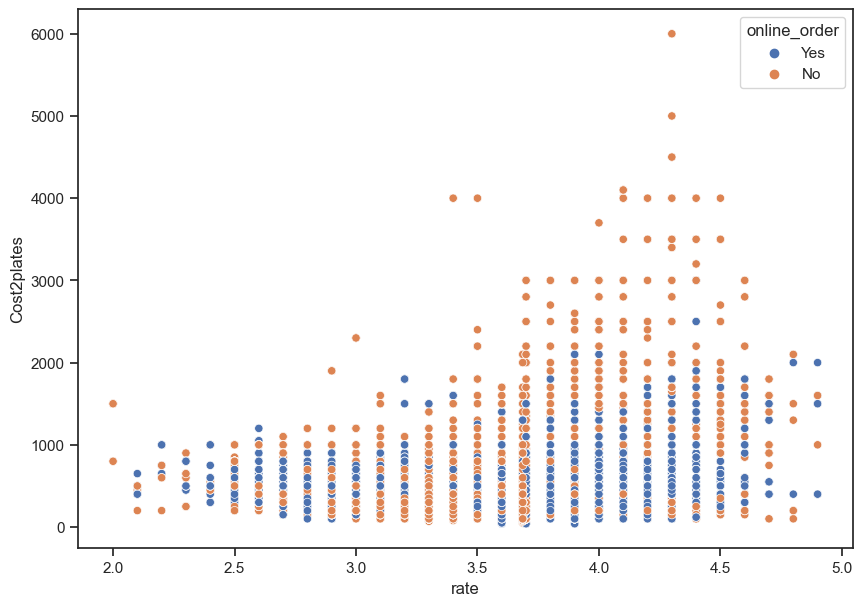

In [85]:


plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='Cost2plates',hue='online_order',data=cost_dist)
plt.show()



### Distribution of Cost for Two People

C:\Users\gullo\AppData\Local\Temp\ipykernel_1336\3780191141.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cost_dist['Cost2plates'])


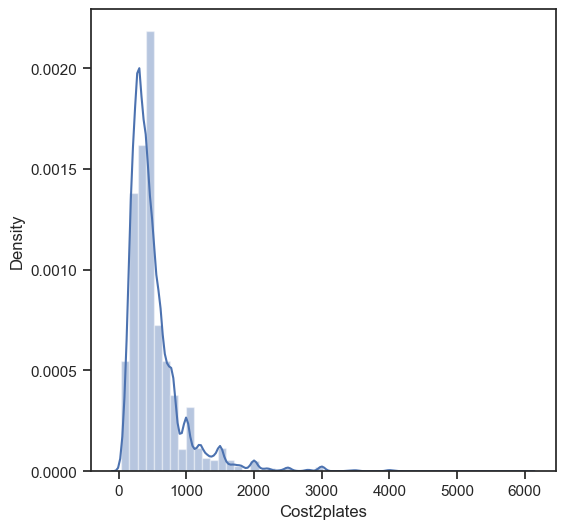

In [86]:
plt.figure(figsize=(6,6))
sns.distplot(cost_dist['Cost2plates'])
plt.show()

### Observations: 
#### We can see that the distribution if left skewed.
#### This means almost 90percent of restaurants serve food for budget less than 1000 INR.($15)



## Visualizing Online Order vs Rate

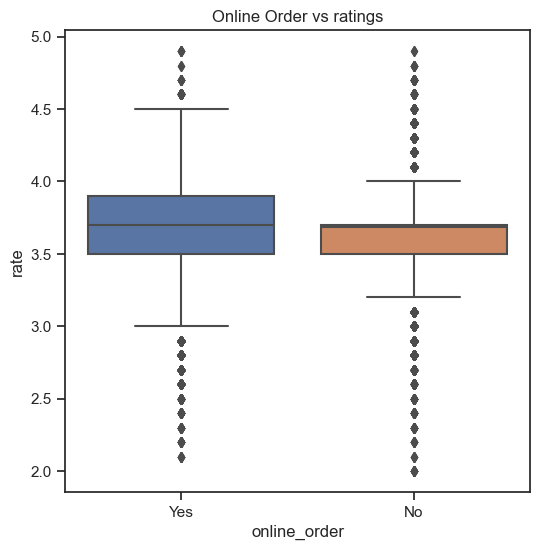

In [89]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.title('Online Order vs ratings')

file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'online_order_vs_rating.png')
                         
plt.savefig(file_path)


### Observations
#### You can observe that median number of votes for both categories vary.
#### Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping up after each order through zomato application.



### Most Common Restaurant types

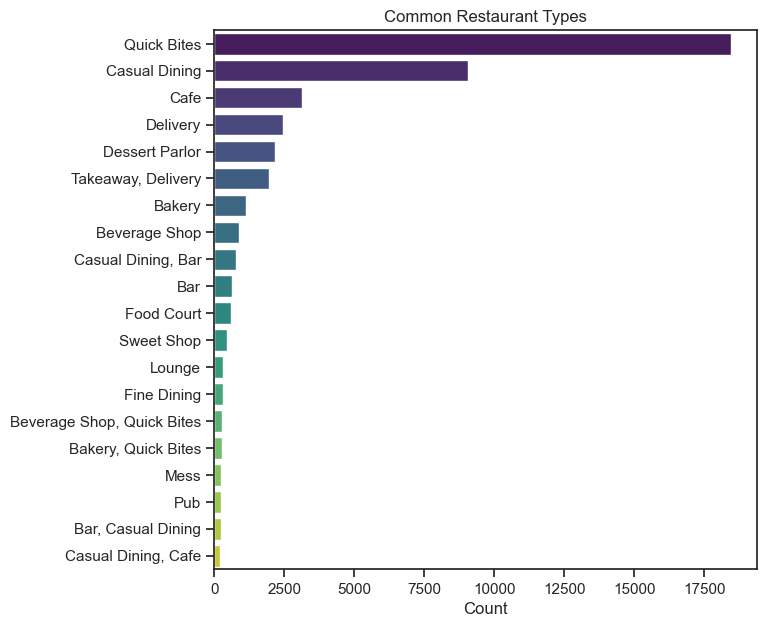

In [91]:
plt.figure(figsize=(7, 7))

# Calculate the count of each restaurant type and select the top 20
rest = df['rest_type'].value_counts()[:20]

# Plot the bar chart
sns.barplot(x=rest, y=rest.index, palette='viridis')

plt.title("Common Restaurant Types")
plt.xlabel("Count")

file_path = 'C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz/Common_Rest_Type.png'
plt.savefig(file_path)

plt.show()


### Observations:
#### No doubt about this as Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
#### We can observe tha Quick Bites type restaurants dominates.



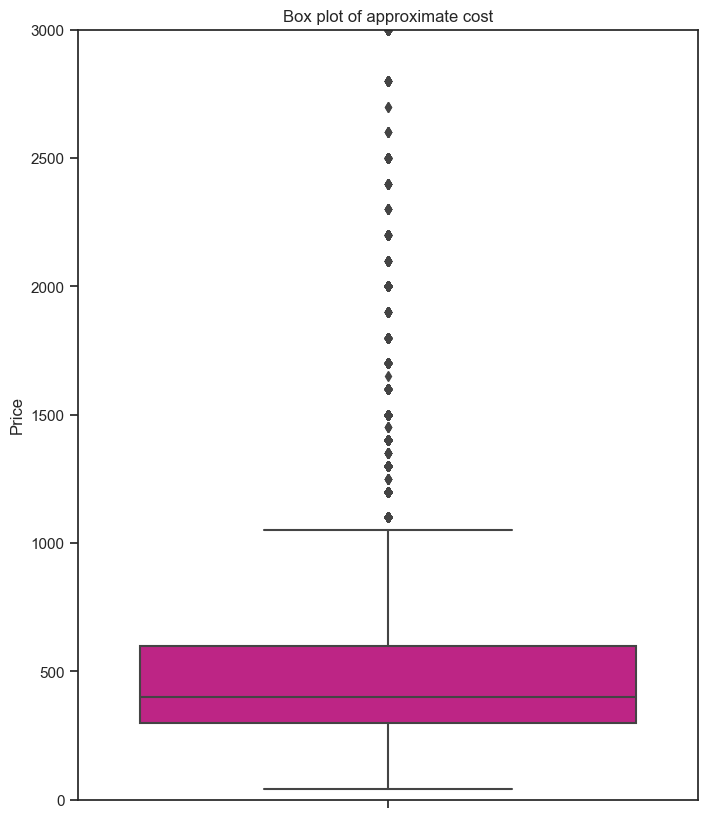

In [96]:

# Create the box plot using Seaborn
plt.figure(figsize=(8, 10))  # Adjust the figure size to elongate the plot vertically
sns.boxplot(y='Cost2plates', data=df, color=(214/255, 12/255, 140/255))

# Set the title and y-axis label
plt.title('Box plot of approximate cost')
plt.ylabel('Price')

# Adjust the y-axis limits to elongate the plot vertically and see more details
plt.ylim(0, 3000)  # Adjust the values based on your data to focus on the desired range

file_path = 'C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz/Approx_cost.png'
plt.savefig(file_path)

plt.show()

### Observations:
#### The median approximate cost for two people is 400 for a single meal.
#### 50 percent of restaurants charge between 300 and 650 for single meal for two people.



In [98]:
df.columns


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type', 'Ratings category'],
      dtype='object')